In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("btcNews_Data.csv")

In [26]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12/07/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13/07/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14/07/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,15/07/2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,16/07/2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


In [6]:
len(df)

2146

In [27]:
df.dtypes


date         object
top_0        object
top_1        object
top_2        object
top_3        object
top_4        object
top_5        object
top_6        object
top_7        object
top_8        object
top_9        object
top_10       object
top_11       object
top_12       object
top_13       object
top_14       object
top_15       object
top_16       object
top_17       object
top_18       object
top_19       object
top_20       object
top_21       object
top_22       object
top_23       object
top_24       object
top_25       object
top_26       object
top_27       object
top_28       object
top_29       object
top_30       object
top_31       object
top_32       object
top_33       object
top_34       object
top_35       object
price       float64
open        float64
high        float64
low         float64
vol.         object
change %     object
dtype: object

In [28]:
df.isna().sum()

date           0
top_0          0
top_1         27
top_2         99
top_3        297
top_4        517
top_5        764
top_6        990
top_7       1166
top_8       1304
top_9       1404
top_10      1476
top_11      1559
top_12      1644
top_13      1712
top_14      1779
top_15      1842
top_16      1877
top_17      1917
top_18      1949
top_19      1980
top_20      2003
top_21      2036
top_22      2064
top_23      2080
top_24      2093
top_25      2108
top_26      2118
top_27      2124
top_28      2127
top_29      2130
top_30      2134
top_31      2135
top_32      2135
top_33      2141
top_34      2143
top_35      2145
price          0
open           0
high           0
low            0
vol.           0
change %       0
dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df_1 = df.set_index('date')

In [30]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12/07/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13/07/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14/07/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,15/07/2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,16/07/2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


In [31]:
df.tail()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
2141,30/05/2021,after the installation of microbt whatsminers ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35652.8,34589.3,36388.6,33441.0,104.18K,3.09%
2142,31/05/2021,brazil is one of the pioneers of cdbc s study ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37298.6,35644.0,37480.7,34213.2,131.70K,4.62%
2143,01/06/2021,our maiden sto listing on the dbs digital ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36687.6,37294.3,37850.3,35742.7,113.48K,-1.64%
2144,02/06/2021,expanding cryptocurrency analysis to find and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37555.8,36687.7,38199.9,35981.1,96.89K,2.37%
2145,03/06/2021,advertisers offering cryptocurrency exchange...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38372.7,37555.7,38372.7,37193.6,93.87K,2.17%


In [15]:
df_1 = df.set_index('date')

In [16]:
df_1.head()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,
2015-07-12,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,save lives earn bitcoin with new ems signpos...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
2015-07-13,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,the forum s all star ama event,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2015-07-14,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,industry heavy hitters reveal the real satosh...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
2015-07-15,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,bitcoin is the killer app for mobile wallets ...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,latest bitcoin price is 620 22 usd,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


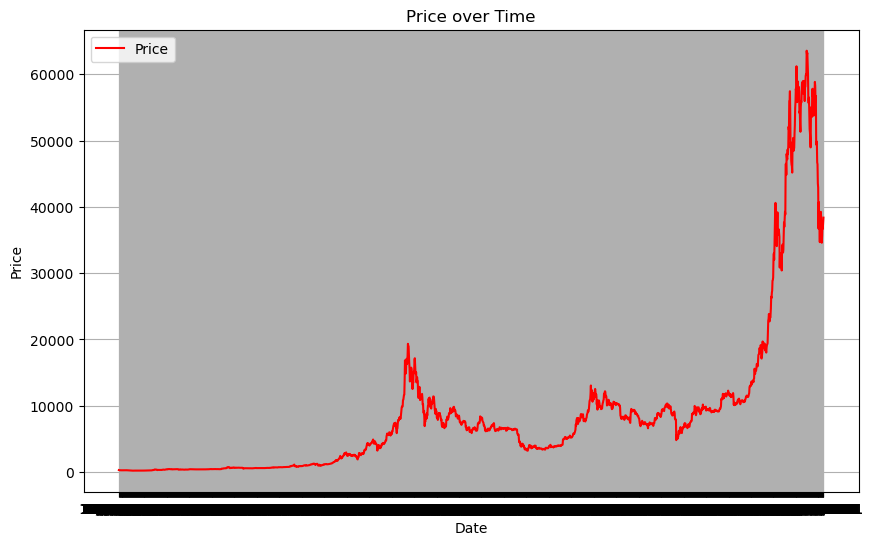

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['price'], label='Price', color='r')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')
plt.grid(True)
plt.legend()


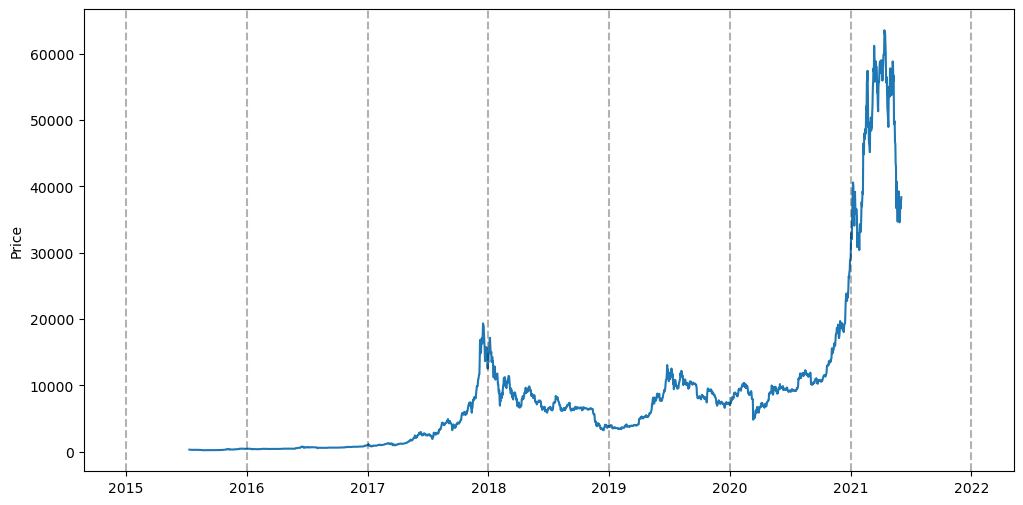

In [63]:
plt.figure(figsize= (12,6))
plt.plot(df_1.price)
plt.ylabel('Price')
for year in range (2015, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha=0.3)

In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2146 entries, 2015-07-12 to 2021-06-03
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   top_0     2146 non-null   object 
 1   top_1     2119 non-null   object 
 2   top_2     2047 non-null   object 
 3   top_3     1849 non-null   object 
 4   top_4     1629 non-null   object 
 5   top_5     1382 non-null   object 
 6   top_6     1156 non-null   object 
 7   top_7     980 non-null    object 
 8   top_8     842 non-null    object 
 9   top_9     742 non-null    object 
 10  top_10    670 non-null    object 
 11  top_11    587 non-null    object 
 12  top_12    502 non-null    object 
 13  top_13    434 non-null    object 
 14  top_14    367 non-null    object 
 15  top_15    304 non-null    object 
 16  top_16    269 non-null    object 
 17  top_17    229 non-null    object 
 18  top_18    197 non-null    object 
 19  top_19    166 non-null    object 
 20  top_20    14

In [72]:
# Remove '%' and convert 'change %' to a numeric column
df_1['change %'] = df_1['change %'].str.replace('%', '').astype(float)

In [73]:
df_1.describe()

,price,open,high,low,change %
count,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,8649.910485,8632.001165,8896.109925,8336.822973,0.303504
std,12071.304908,12055.215223,12454.354964,11588.466405,3.975095
min,211.400000,211.400000,226.600000,196.300000,-39.180000
25%,896.000000,894.600000,914.700000,871.800000,-1.180000
50%,6394.950000,6391.000000,6528.800000,6278.900000,0.210000
75%,9578.575000,9568.525000,9750.700000,9325.050000,1.817500
max,63540.900000,63544.200000,64778.000000,62067.500000,25.560000


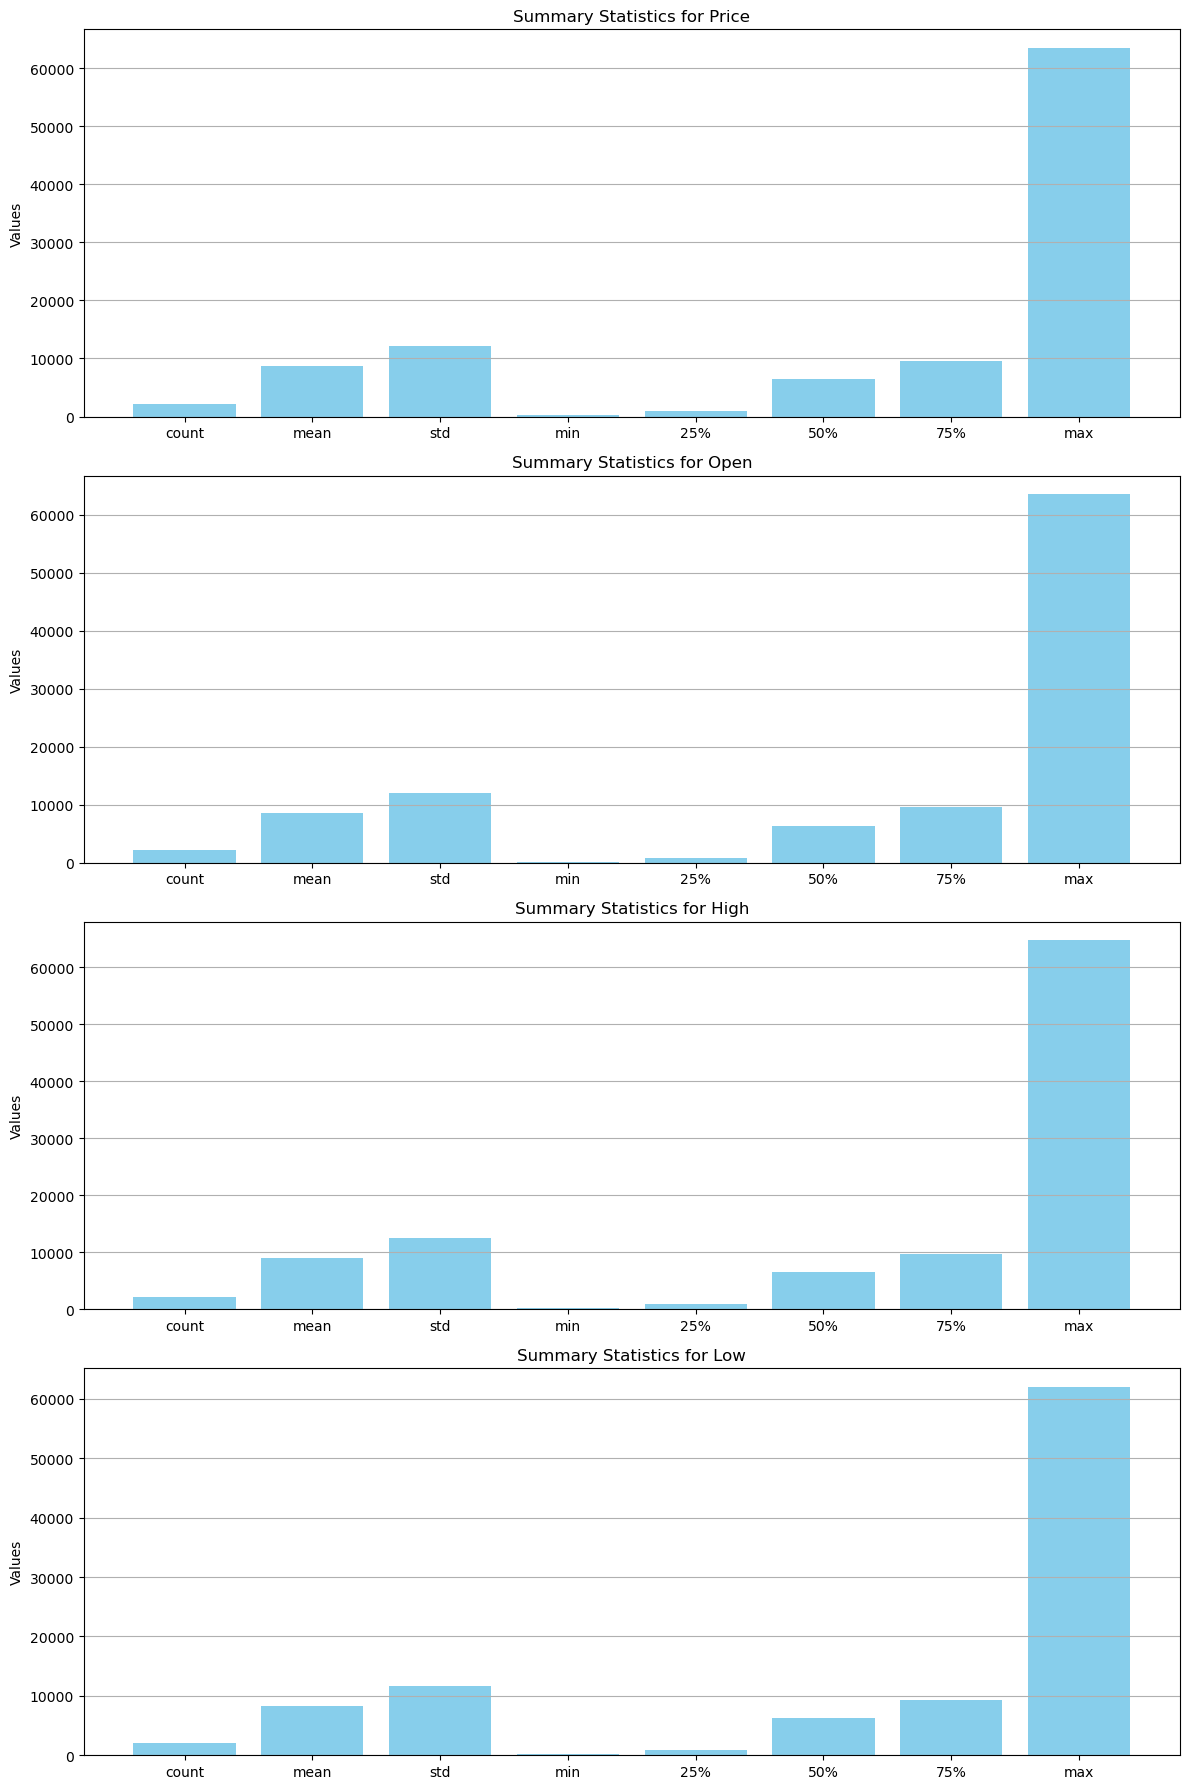

In [59]:
summary_stats = df_1[['price', 'open', 'high', 'low']].describe()

# Transpose the summary statistics to make it easier to plot
summary_stats = summary_stats.T

# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))

# Create individual plots for each metric
for i, column in enumerate(summary_stats.index):
    axes[i].bar(summary_stats.columns, summary_stats.loc[column], color='skyblue')
    axes[i].set_title(f'Summary Statistics for {column.capitalize()}')
    axes[i].set_ylabel('Values')
    axes[i].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

### parametric and Non Parametricm

For normally distributed data, parametric like t-test, Anova, preason corelation

#### Looking into normal distribution

In [74]:
# Define the bins and labels based on the min and max values
bins = [-40, -30, -20, -10, -5, 0, 5, 10, 20, 30]  # Adjust for your data range
labels = ['-40% to -30%', '-30% to -20%', '-20% to -10%', '-10% to -5%', 
          '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% to 30%']

# Bin the 'change %' data
df_1['change % bin'] = pd.cut(df_1['change %'], bins=bins, labels=labels)


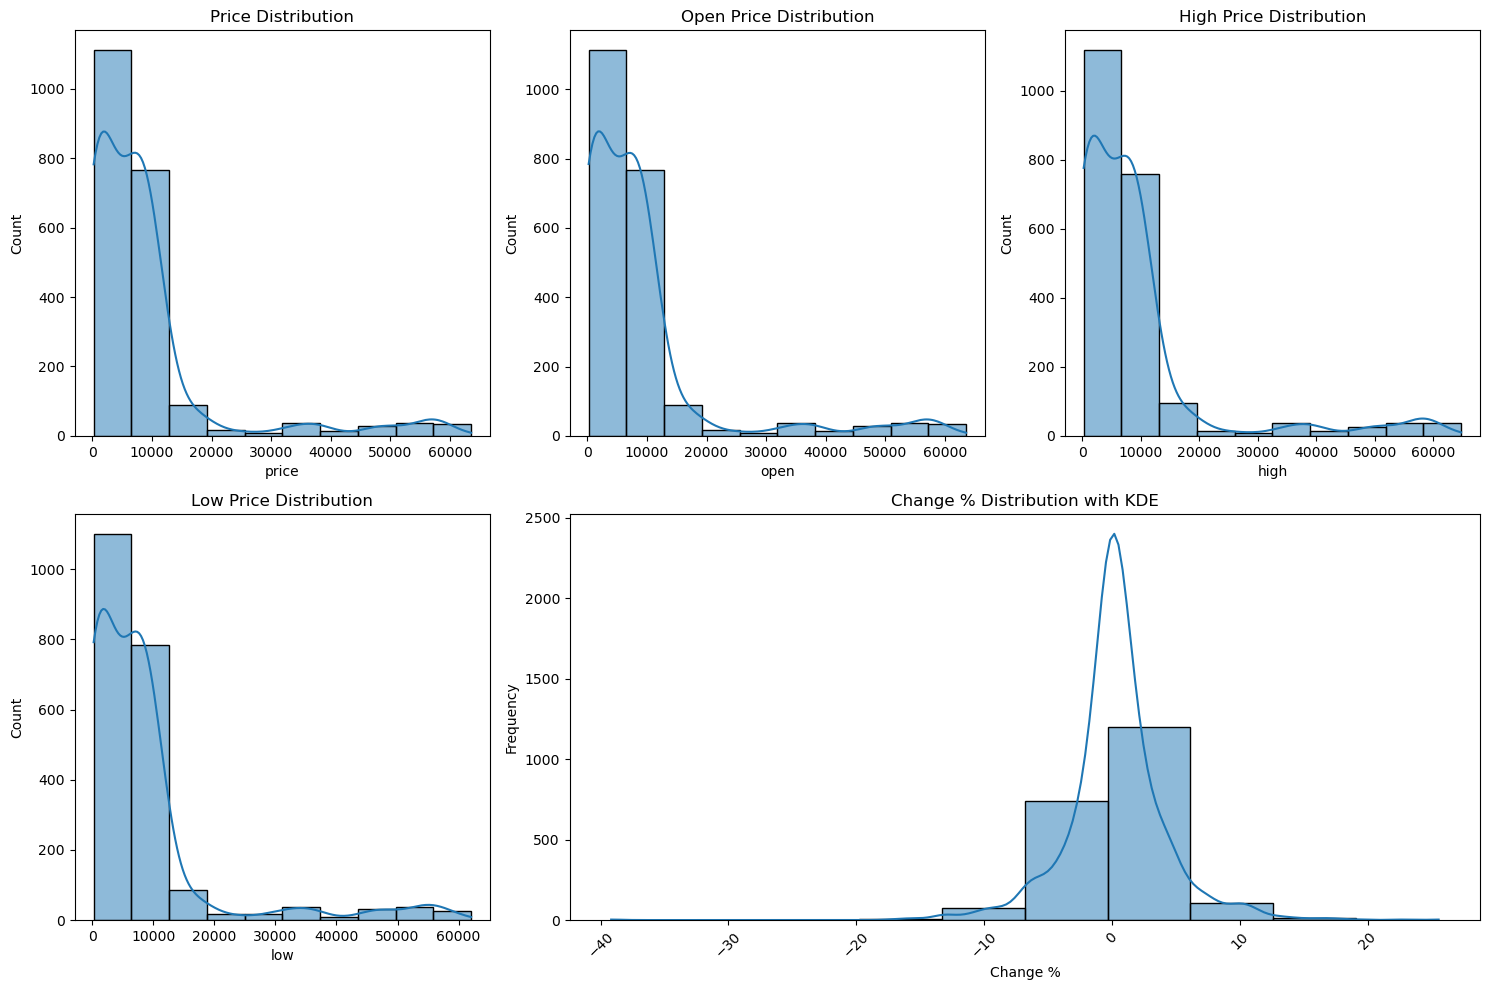

In [81]:
import matplotlib.gridspec as gridspec
# Set up the grid layout (2 rows, 3 columns)
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1])  # Define the grid

# Plot each distribution
ax1 = plt.subplot(gs[0, 0])
sns.histplot(df_1['price'], bins=10, kde=True, ax=ax1)
ax1.set_title('Price Distribution')

ax2 = plt.subplot(gs[0, 1])
sns.histplot(df_1['open'], bins=10, kde=True, ax=ax2)
ax2.set_title('Open Price Distribution')

ax3 = plt.subplot(gs[0, 2])
sns.histplot(df_1['high'], bins=10, kde=True, ax=ax3)
ax3.set_title('High Price Distribution')

ax4 = plt.subplot(gs[1, 0])
sns.histplot(df_1['low'], bins=10, kde=True, ax=ax4)
ax4.set_title('Low Price Distribution')

# Make the 'change %' plot span two columns (1,1 and 1,2)
ax5 = plt.subplot(gs[1, 1:3])  # Span two columns
sns.histplot(df_1['change %'], bins=10, kde=True, ax=ax5)  # Use histplot with KDE=True
ax5.set_title('Change % Distribution with KDE')
ax5.set_xlabel('Change %')
ax5.set_ylabel('Frequency')

# Rotate tick labels without using FixedFormatter
ax5.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

In [105]:
df_1.sample()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,...,top_33,top_34,top_35,price,open,high,low,vol.,change %,change % bin
date,,,,,,,,,,,,,,,,,,,,,
2017-03-11,bitcoin price on quick rebound after etf dive,bitcoin legality in india is a political hobgo...,bitcoin helps venezuelan families avoid starva...,bitcoin s current exchange rate is 7465 99 usd...,pr pablo escobar s brother releases dietbitco...,pr xceltrip accepts major crypto currencies o...,arbitrators to resolve disputes in the russian...,crypto derivatives could become an order of m...,thailand approves country s first ico portal,iost in the first batch of blockchains to supp...,...,NaN,NaN,NaN,1179.2,1112.4,1202.7,1104.8,70.75K,6.01,5% to 10%


In [85]:
df_1['change % bin'].value_counts()

change % bin
0% to 5%        991
-5% to 0%       824
5% to 10%       132
-10% to -5%     125
10% to 20%       42
-20% to -10%     29
20% to 30%        2
-40% to -30%      1
-30% to -20%      0
Name: count, dtype: int64

In [97]:
grouped_data = [group['price'].values for name, group in df_1.groupby('change % bin') if len(group) > 0]

# Check each group for size and variance
for idx, group in enumerate(grouped_data):
    print(f"Group {idx + 1}: size = {len(group)}, variance = {np.var(group)}")


Group 1: size = 1, variance = 0.0
Group 2: size = 29, variance = 124100002.56380498
Group 3: size = 125, variance = 181864560.08003458
Group 4: size = 824, variance = 142176486.09207904
Group 5: size = 991, variance = 132113801.68381077
Group 6: size = 132, variance = 216380411.6338493
Group 7: size = 42, variance = 146152841.7804535
Group 8: size = 2, variance = 48890161.622499995


In [98]:
filtered_grouped_data = [group for group in grouped_data if len(group) > 1 and np.var(group) > 0]

In [100]:
# import scipy.stats as stats
# # Check if we still have at least two valid groups for ANOVA
# if len(filtered_grouped_data) > 1:
#     # Perform one-way ANOVA
#     anova_result = stats.f_oneway(*filtered_grouped_data)

#     # Print the results
#     print('ANOVA Results:')
#     print(f'F-statistic: {anova_result.statistic}')
#     print(f'p-value: {anova_result.pvalue}')
# else:
#     print("Not enough valid groups with non-zero variance for ANOVA.")

ANOVA Results:
F-statistic: 3.847264595383544
p-value: 0.0008027610128824415


In [101]:
if len(filtered_grouped_data) > 1:
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*filtered_grouped_data)

    # Degrees of freedom
    df_between = len(filtered_grouped_data) - 1  # df1: Number of groups - 1
    df_within = sum([len(group) for group in filtered_grouped_data]) - len(filtered_grouped_data)  # df2: Total observations - Number of groups
    
    # Calculate critical value (alpha = 0.05)
    alpha = 0.05
    critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

    # Print the results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_result.statistic}')
    print(f'p-value: {anova_result.pvalue}')
    print(f'Critical value (alpha = {alpha}): {critical_value}')
else:
    print("Not enough valid groups with non-zero variance for ANOVA.")

ANOVA Results:
F-statistic: 3.847264595383544
p-value: 0.0008027610128824415
Critical value (alpha = 0.05): 2.102818483756683


In [111]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import f

# # Given F-value, critical value, and degrees of freedom
# f_value = anova_result.statistic
# critical_value = critical_value
# dfn, dfd = df_between, df_within  # Degrees of freedom for ANOVA (numerator and denominator)

# # Create a range of F-distribution values
# x = np.linspace(0, 10, 500)
# y = f.pdf(x, dfn, dfd)

# # sns.histplot(df_1['change %'], bins=10, kde=True) 
# # Plot the F-distribution
# plt.figure(figsize=(8, 6))
# plt.plot(x, y, label='F-distribution', color='green')

# # Highlight the rejection region
# plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.5, label='Rejection Region')

# # Mark the critical value and F-value
# plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value = {critical_value}')
# plt.axvline(f_value, color='blue', linestyle='--', label=f'F-value = {f_value}')

# # Add labels and title
# plt.title('ANOVA F-Test: Rejection Region and Critical Value')
# plt.xlabel('F-Value')
# plt.ylabel('Density')
# plt.legend()

# # Show the plot
# plt.show()


ANOVA Results:
F-statistic: 3.847264595383544
p-value: 0.0008027610128824415
Critical value (alpha = 0.05): 2.102818483756683


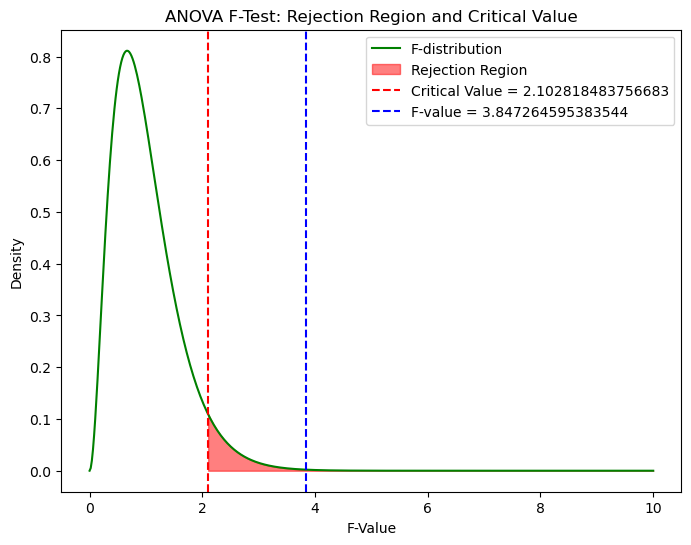

In [110]:
from scipy import stats

# Assuming filtered_grouped_data is already defined
if len(filtered_grouped_data) > 1:
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*filtered_grouped_data)

    # Degrees of freedom
    df_between = len(filtered_grouped_data) - 1  # df1: Number of groups - 1
    df_within = sum([len(group) for group in filtered_grouped_data]) - len(filtered_grouped_data)  # df2: Total observations - Number of groups
    
    # Calculate critical value (alpha = 0.05)
    alpha = 0.05
    critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

    # Print the results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_result.statistic}')
    print(f'p-value: {anova_result.pvalue}')
    print(f'Critical value (alpha = {alpha}): {critical_value}')

    # Calculate x for F-distribution
    # Here we set an upper limit for x. You can adjust this based on your needs.
    x_max = max(critical_value + 5, 10)  # Ensures x extends beyond the critical value
    x = np.linspace(0, x_max, 500)  # Create x values

    # F-distribution PDF
    y = stats.f.pdf(x, df_between, df_within)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='F-distribution', color='green')

    # Highlight the rejection region
    plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.5, label='Rejection Region')

    # Mark the critical value and F-value
    plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value = {critical_value}')
    plt.axvline(anova_result.statistic, color='blue', linestyle='--', label=f'F-value = {anova_result.statistic}')

    # Add labels and title
    plt.title('ANOVA F-Test: Rejection Region and Critical Value')
    plt.xlabel('F-Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("Not enough valid groups with non-zero variance for ANOVA.")


F value > critical value, <br> we reject the null hypothesis (which states there is no difference between groups). This indicates a significant difference between groups, suggesting that this column is important.

In [115]:
# Function to convert 'K' and 'M' to numeric values
def convert_to_numeric(val):
    if isinstance(val, str):
        if 'K' in val:
            return float(val.replace('K', '')) * 1e3
        elif 'M' in val:
            return float(val.replace('M', '')) * 1e6
    return float(val)

In [ ]:
# Apply the conversion to the 'vol.' column
df_1['vol.'] = df_1['vol.'].apply(convert_to_numeric)

In [116]:
import pandas as pd
from scipy.stats import kruskal


# Extract relevant numeric columns for comparison
numeric_columns = ['price', 'open', 'high', 'low', 'vol.', 'change %']
groups = [df_1[col].values for col in numeric_columns]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups (reject H0).")
else:
    print("There is no significant difference between the groups (fail to reject H0).")


Kruskal-Wallis H-statistic: 8783.237704950117
P-value: 0.0
There is a significant difference between the groups (reject H0).


In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Visualizing with a box plot for the transaction_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['transaction_amount'])
plt.title('Box Plot for Transaction Amount')
plt.show()

# Time series plot for transaction amounts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['transaction_amount'], label='Transaction Amount')
plt.title('Time Series Plot for Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

# Z-score method for detecting outliers
data['zscore'] = (data['transaction_amount'] - data['transaction_amount'].mean()) / data['transaction_amount'].std()
outliers = data[data['zscore'].abs() > 3]

# IQR method for detecting outliers
Q1 = data['transaction_amount'].quantile(0.25)
Q3 = data['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['transaction_amount'] < (Q1 - 1.5 * IQR)) | (data['transaction_amount'] > (Q3 + 1.5 * IQR))]

# Seasonal decomposition to check anomalies in residuals (if time series data has seasonality)
decomposition = seasonal_decompose(data['transaction_amount'], model


### ACF and PACF

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

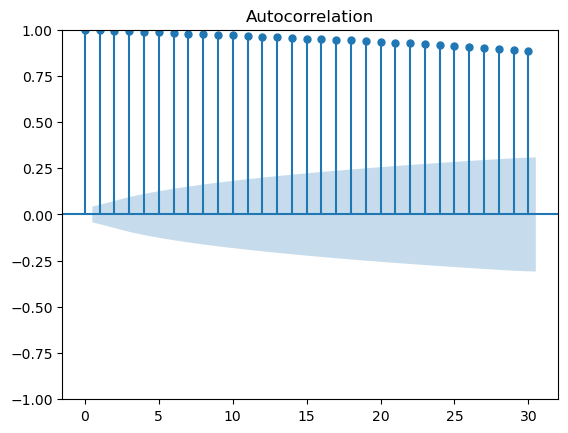

In [48]:
acf_plot = plot_acf(df_1.price, lags= 30)

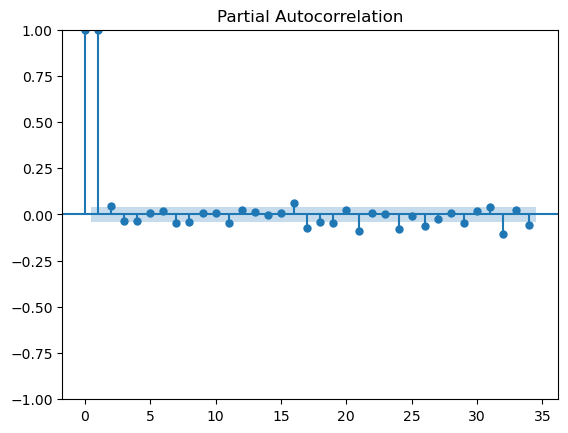

In [49]:
pacf_plot = plot_pacf(df_1.price)